# Derive the mass matrix for a floating base system

In [1]:
# symbolic computation tools
import sympy as sp
from sympy import symbols, pprint, Function, simplify, Derivative, nsimplify
from sympy import sin, cos, asin, acos, pi, diff
from sympy import Matrix, latex, BlockMatrix
from sympy import print_latex
import numpy as np

from scipy.integrate import solve_ivp

from sympy import init_printing
init_printing() 

# Derivation of dynamics through Euler-Lagrange

In [3]:
(t, 
 l0, 
 l1, 
 m0, 
 m1, 
 I0, 
 I1,
 L, 
 g) = symbols("""t
                         l0 
                         l1,
                         m0, 
                         m1, 
                         I0, 
                         I1, 
                         L,
                         g""" , real = True)
 
theta = Function('theta', real=True)(t)
x = Function('x', real=True)(t)
y = Function('y', real=True)(t)

alpha = Function('alpha', real=True)(t)
p = Function('p', real=True)(t)


In [32]:
### Position of COMS
x0 = x + l0*cos(theta)
y0 = y + l0*sin(theta)

x1 = x + l0*cos(theta) + l1*cos(theta + alpha)
y1 = y + l0*sin(theta) + l1*sin(theta + alpha)


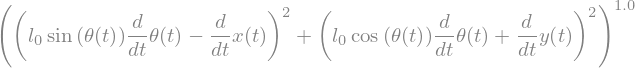

In [33]:
v0 = (diff(x0, t)**2 + diff(y0, t)**2)**(1/2)
v0 = simplify(v0)
v0**2

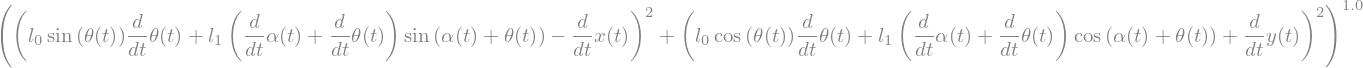

In [34]:
v1 = (diff(x1, t)**2 + diff(y1, t)**2)**(1/2)
v1 = simplify(v1)
v1**2

## Assemble Lagrangian

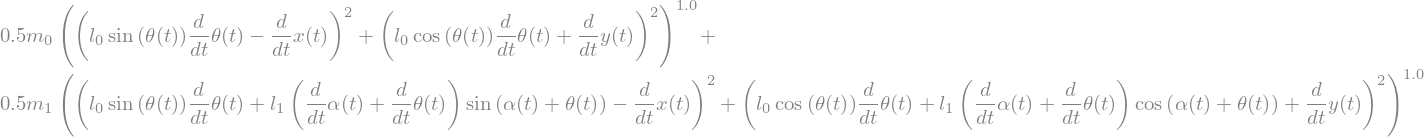

In [43]:
T = (1/2)*(m0*v0**2 + m1*v1**2) # + I0*diff(theta,t)**2 + I1*diff(theta + alpha, t)**2)
V = 0

# V = m0*g*y0 + m1*g*y1
# + m1*g*y2

L = T - V
L = simplify(L)
L

## Derive EOMs from Euler-Lagrange equations

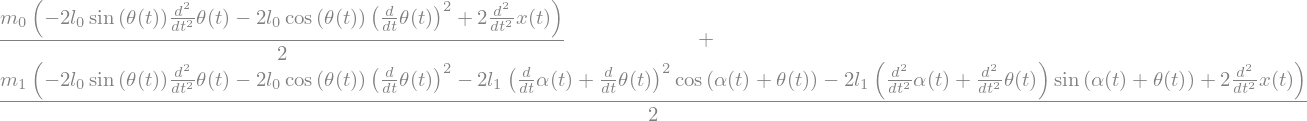

In [44]:
EOM_x = diff(diff(L, Derivative(x, t)), t) - diff(L, x)
EOM_x = nsimplify(EOM_x)
EOM_x

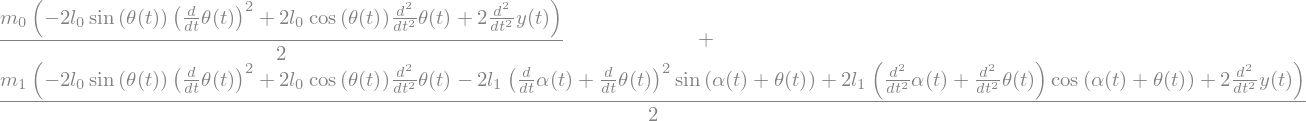

In [45]:
EOM_y = diff(diff(L, Derivative(y, t)), t) - diff(L, y)
EOM_y = nsimplify(EOM_y)
EOM_y

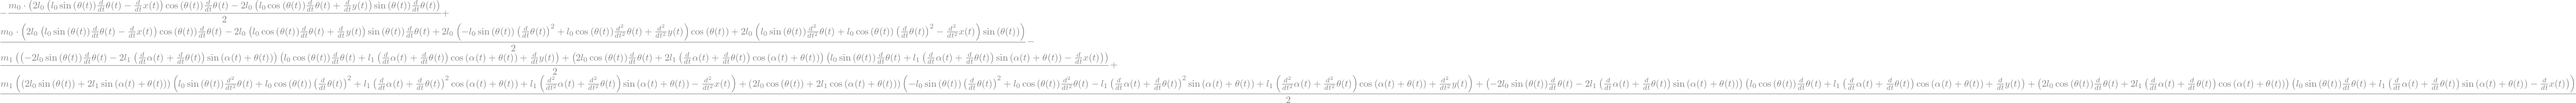

In [46]:
EOM_theta = diff(diff(L, Derivative(theta, t)), t) - diff(L, theta)
EOM_theta = nsimplify(EOM_theta)
EOM_theta

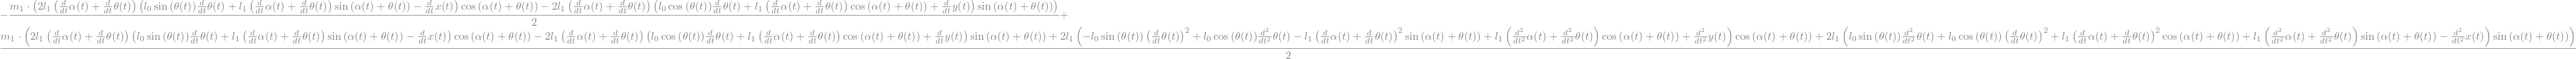

In [47]:
EOM_alpha = diff(diff(L, Derivative(alpha, t)), t) - diff(L, alpha)
EOM_alpha = nsimplify(EOM_alpha)
EOM_alpha

# Assemble the mass matrix

In [48]:
mass = sp.symarray('',(4,4))

mass[0,0] = EOM_x.expand().coeff(Derivative(x,t,t))

mass[0,1] = EOM_x.expand().coeff(Derivative(y,t,t))
mass[1,0] = mass[0,1]

mass[0,2] = EOM_x.expand().coeff(Derivative(theta,t,t))
mass[2,0] = mass[0,2]

mass[0,3] = EOM_x.expand().coeff(Derivative(alpha,t,t))
mass[3,0] = mass[0,3]

mass[1,1] = EOM_y.expand().coeff(Derivative(y,t,t))

mass[1,2] = EOM_y.expand().coeff(Derivative(theta,t,t))
mass[2,1] = mass[1,2]

mass[1,3] = EOM_y.expand().coeff(Derivative(alpha,t,t))
mass[3,1] = mass[1,3]

mass[2,2] = EOM_theta.expand().coeff(Derivative(theta,t,t))

mass[2,3] = EOM_theta.expand().coeff(Derivative(alpha,t,t))
mass[3,2] = mass[2,3]

mass[3,3] = EOM_alpha.expand().coeff(Derivative(alpha,t,t))

mass = Matrix(mass)

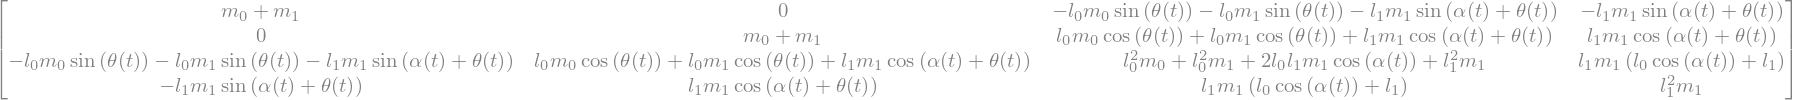

In [49]:
simplify(mass)

## Try a floating three-link

In [52]:
(m2, I2, l2) = symbols("""m2, I2, l2""" , real = True)

beta = Function('beta', real=True)(t)

In [53]:
### Position of COMS
x0 = x + l0*cos(theta)
y0 = y + l0*sin(theta)

x1 = x + l0*cos(theta) + l1*cos(theta + alpha)
y1 = y + l0*sin(theta) + l1*sin(theta + alpha)

x2 = x + l0*cos(theta) + l1*cos(theta + alpha) + l2*cos(theta + alpha + beta)
y2 = y + l0*sin(theta) + l1*sin(theta + alpha) + l2*sin(theta + alpha + beta)



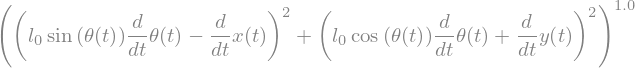

In [54]:
v0 = (diff(x0, t)**2 + diff(y0, t)**2)**(1/2)
v0 = simplify(v0)
v0**2

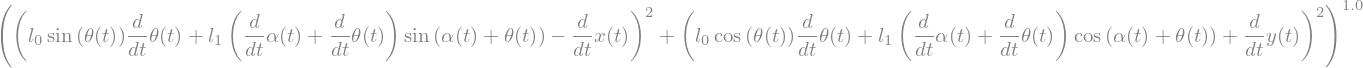

In [55]:
v1 = (diff(x1, t)**2 + diff(y1, t)**2)**(1/2)
v1 = simplify(v1)
v1**2

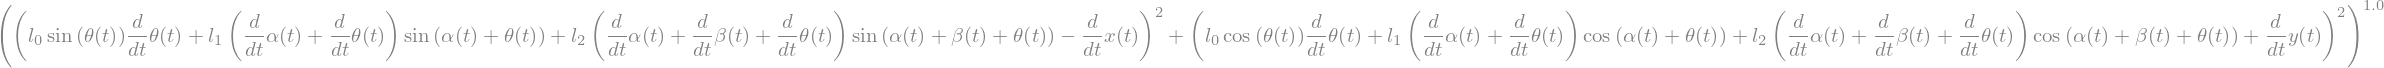

In [56]:
v2 = (diff(x2, t)**2 + diff(y2, t)**2)**(1/2)
v2 = simplify(v2)
v2**2

## Assemble Lagrangian

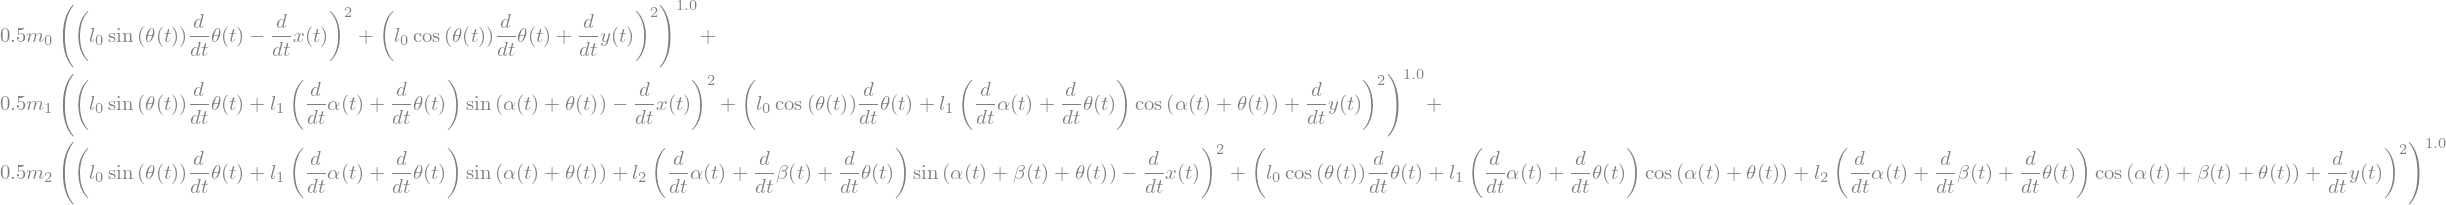

In [62]:
T = (1/2)*(m0*v0**2 + m1*v1**2 + m2*v2**2) # + I0*diff(theta,t)**2 + I1*diff(theta + alpha, t)**2)
V = 0

# V = m0*g*y0 + m1*g*y1
# + m1*g*y2

L = T - V
L = simplify(L)
L

## Derive EOMs from Euler-Lagrange equations

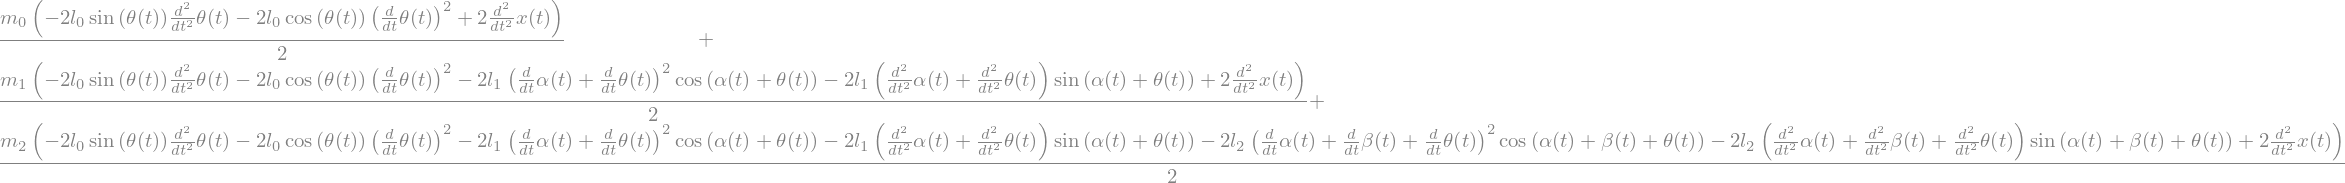

In [63]:
EOM_x = diff(diff(L, Derivative(x, t)), t) - diff(L, x)
EOM_x = nsimplify(EOM_x)
EOM_x

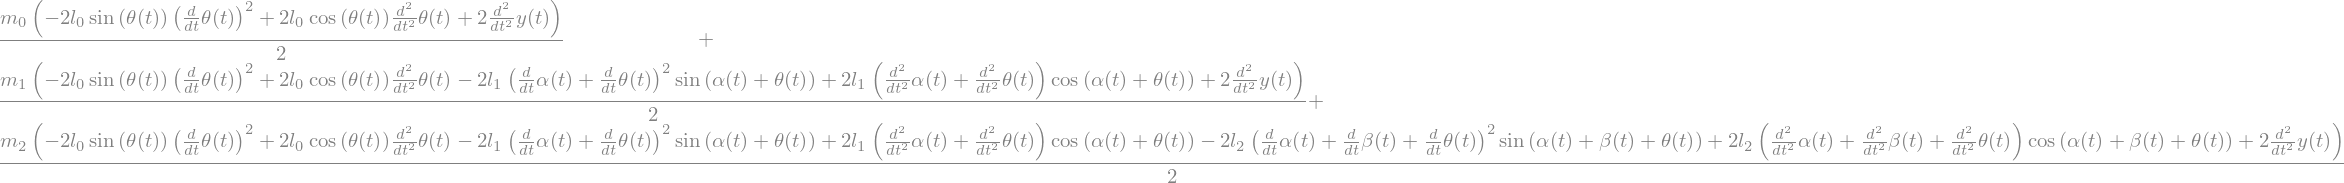

In [64]:
EOM_y = diff(diff(L, Derivative(y, t)), t) - diff(L, y)
EOM_y = nsimplify(EOM_y)
EOM_y

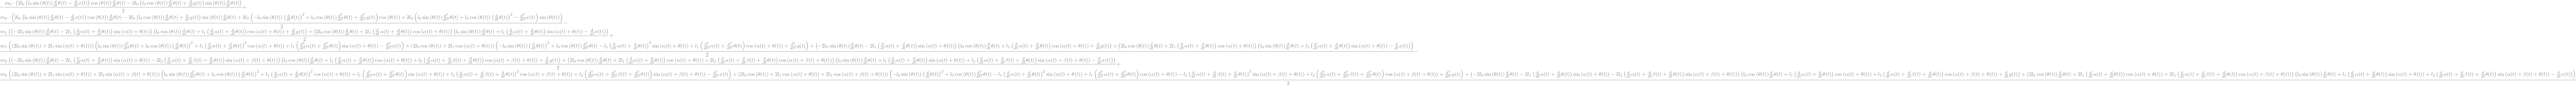

In [65]:
EOM_theta = diff(diff(L, Derivative(theta, t)), t) - diff(L, theta)
EOM_theta = nsimplify(EOM_theta)
EOM_theta

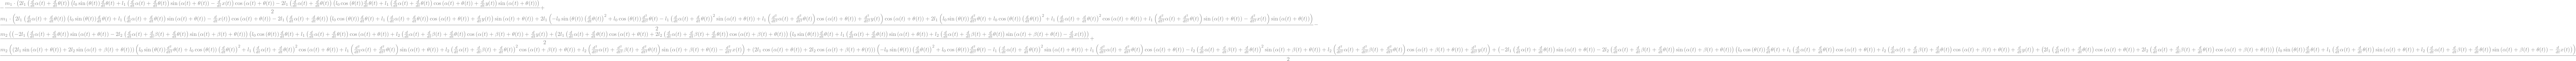

In [66]:
EOM_alpha = diff(diff(L, Derivative(alpha, t)), t) - diff(L, alpha)
EOM_alpha = nsimplify(EOM_alpha)
EOM_alpha

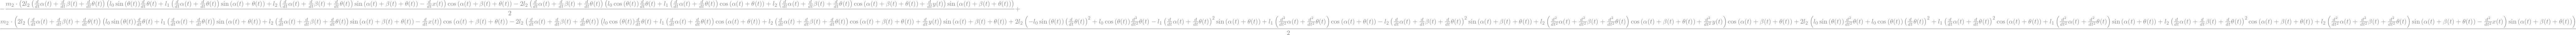

In [67]:
EOM_beta = diff(diff(L, Derivative(beta, t)), t) - diff(L, beta)
EOM_beta = nsimplify(EOM_beta)
EOM_beta

# Assemble the mass matrix

In [80]:
mass = sp.symarray('',(5,5))

mass[0,0] = EOM_x.expand().coeff(Derivative(x,t,t))

mass[0,1] = EOM_x.expand().coeff(Derivative(y,t,t))
mass[1,0] = mass[0,1]

mass[0,2] = EOM_x.expand().coeff(Derivative(theta,t,t))
mass[2,0] = mass[0,2]

mass[0,3] = EOM_x.expand().coeff(Derivative(alpha,t,t))
mass[3,0] = mass[0,3]

mass[0,4] = EOM_x.expand().coeff(Derivative(beta,t,t))
mass[4,0] = mass[0,4]

mass[1,1] = EOM_y.expand().coeff(Derivative(y,t,t))

mass[1,2] = EOM_y.expand().coeff(Derivative(theta,t,t))
mass[2,1] = mass[1,2]

mass[1,3] = EOM_y.expand().coeff(Derivative(alpha,t,t))
mass[3,1] = mass[1,3]

mass[1,4] = EOM_y.expand().coeff(Derivative(beta,t,t))
mass[4,1] = mass[1,4]

mass[2,2] = EOM_theta.expand().coeff(Derivative(theta,t,t))

mass[2,3] = EOM_theta.expand().coeff(Derivative(alpha,t,t))
mass[3,2] = mass[2,3]

mass[2,4] = EOM_theta.expand().coeff(Derivative(beta,t,t))
mass[4,2] = mass[4,2]

mass[3,3] = EOM_alpha.expand().coeff(Derivative(alpha,t,t))

mass[3,4] = EOM_alpha.expand().coeff(Derivative(beta,t,t))
mass[4,3] = mass[3,4]

mass[4,4] = EOM_beta.expand().coeff(Derivative(beta,t,t))

mass = Matrix(mass)

In [81]:
mass = simplify(mass)

In [73]:
mass

⎡                                                             m₀ + m₁ + m₂                                                                    
⎢                                                                                                                                             
⎢                                                                  0                                                                          
⎢                                                                                                                                             
⎢                                                                                                                                             
⎢-l₀⋅m₀⋅sin(θ(t)) - l₀⋅m₁⋅sin(θ(t)) - l₀⋅m₂⋅sin(θ(t)) - l₁⋅m₁⋅sin(α(t) + θ(t)) - l₁⋅m₂⋅sin(α(t) + θ(t)) - l₂⋅m₂⋅sin(α(t) + β(t) + θ(t))  l₀⋅m₀
⎢                                                                                                                                             

In [82]:
print_latex(mass)

\left[\begin{matrix}m_{0} + m_{1} + m_{2} & 0 & - l_{0} m_{0} \sin{\left(\theta{\left(t \right)} \right)} - l_{0} m_{1} \sin{\left(\theta{\left(t \right)} \right)} - l_{0} m_{2} \sin{\left(\theta{\left(t \right)} \right)} - l_{1} m_{1} \sin{\left(\alpha{\left(t \right)} + \theta{\left(t \right)} \right)} - l_{1} m_{2} \sin{\left(\alpha{\left(t \right)} + \theta{\left(t \right)} \right)} - l_{2} m_{2} \sin{\left(\alpha{\left(t \right)} + \beta{\left(t \right)} + \theta{\left(t \right)} \right)} & - l_{1} m_{1} \sin{\left(\alpha{\left(t \right)} + \theta{\left(t \right)} \right)} - l_{1} m_{2} \sin{\left(\alpha{\left(t \right)} + \theta{\left(t \right)} \right)} - l_{2} m_{2} \sin{\left(\alpha{\left(t \right)} + \beta{\left(t \right)} + \theta{\left(t \right)} \right)} & - l_{2} m_{2} \sin{\left(\alpha{\left(t \right)} + \beta{\left(t \right)} + \theta{\left(t \right)} \right)}\\0 & m_{0} + m_{1} + m_{2} & l_{0} m_{0} \cos{\left(\theta{\left(t \right)} \right)} + l_{0} m_{1} \cos{\left(\

In [83]:
print_latex(mass[3:,3:])

\left[\begin{matrix}l_{1}^{2} m_{1} + l_{1}^{2} m_{2} + 2 l_{1} l_{2} m_{2} \cos{\left(\beta{\left(t \right)} \right)} + l_{2}^{2} m_{2} & l_{2} m_{2} \left(l_{1} \cos{\left(\beta{\left(t \right)} \right)} + l_{2}\right)\\l_{2} m_{2} \left(l_{1} \cos{\left(\beta{\left(t \right)} \right)} + l_{2}\right) & l_{2}^{2} m_{2}\end{matrix}\right]
